# Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

#### Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)
#### Notebook for the Project in the Course [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

## Setup and imports

1. Install Hugging Face's nlp package
2. Import libraries

In [1]:
# importing libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [2]:
# creating a function to a line graph representing the historical progress of training and validation accuracy and loss

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training') # range from 0 to the last epoch, historical representation of accuracy in the training dataset
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation') # range from 0 to the last epoch, historical representation of validation accuracy in the training dataset
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training') # range from 0 to the last epoch, historical representation of loss in the training dataset
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation') # range from 0 to the last epoch, historical representation of validation loss in the training dataset
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true') # passing in the true values and predicted in the confusion matrix

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes) # passing in the six emotions as the labels
    plt.yticks(list(range(0, 6)), labels=classes) # passing in the six emotions as the labels
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


## Importing Data

1. Import Tweet Emotion dataset
2. Create train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
dataset = nlp.load_dataset('emotion') # loading the HuggingFace nlp dataset
dataset

Using custom data configuration default


{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [4]:
train = dataset['train'] # assigning the training dataset to a variable
val = dataset['validation'] # assigning the validation dataset to a variable
test = dataset['test'] # assigning the test dataset to a variable

In [5]:
# creating a function to pass in the text and assinging to tweets or X and the emotions assigned to labels or y

def get_tweet(data):
    tweets =[x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [6]:
tweets, labels = get_tweet(train) # passing the training model through the function now we have X and y

In [7]:
tweets[0], labels[0] # getting the first sentence, and emotion

('i didnt feel humiliated', 'sadness')

## Keras Tokenizer

1. Tokenize tweets

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer # importing Tokenizer from keras

In [9]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets) # fitting the tweets to the tokenizer, words will not be represented by a number (id)

In [10]:
tokenizer.texts_to_sequences([tweets[0]]) # the words i didnt feel humiliated now in numbers

[[2, 139, 3, 679]]

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <BarContainer object of 64 artists>)

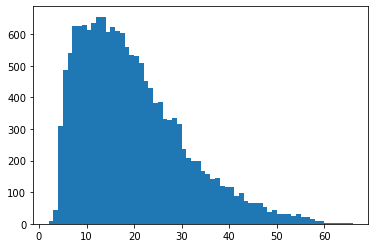

In [11]:
lengths = [len(t.split(' '))for t in tweets] # understanding the breakdown of words by tweet
plt.hist(lengths, bins=len(set(lengths)))

## Padding and Truncating Sequences

1. Check length of tweets
2. Create padded sequences

In [12]:
# based on the graph above, setting the max length of words to be 50

maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
# function to get sequences for our different sets

def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets) # getting the sequences and passing all of the tweets in the dataset
    padded = pad_sequences(sequences, truncating ='post', padding ='post', maxlen = maxlen) # passing the sequences, truncating at the end of the sequence and padding any empty slots since the max length is 50
    return padded

In [14]:
padded_train_seq = get_sequences(tokenizer, tweets) # passing in tokenizer and tweets to get sequences

In [15]:
padded_train_seq[0] # the first tweet only had 4 words, therefore it has 46 words padded

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries (Emotions)
2. Converting text labels to numeric labels

In [16]:
classes = set(labels) # setting the emotions as classes
print(classes)

{'love', 'anger', 'sadness', 'fear', 'joy', 'surprise'}


In [17]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v,k) for k, v in class_to_index.items())

class_to_index

In [19]:
index_to_class

{0: 'love', 1: 'anger', 2: 'sadness', 3: 'fear', 4: 'joy', 5: 'surprise'}

In [20]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [21]:
train_labels  = names_to_ids(labels)
print(train_labels[0])

2


## Creating the Model

1. Creating the model
2. Compiling the model

In [22]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000,16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Training the Model

1. Preparing a validation set
2. Training the model

In [24]:
# now putting validation dataset through process to be preprocessed

val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [25]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 2)

In [26]:
# fitting the data into the model to run and test accuracy on prediction

h = model.fit(
    padded_train_seq, 
    train_labels, 
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2) # stop running if val accuracy begins to drop
    ]
)

Epoch 1/20
500/500 [==============================] - 12s 19ms/step - loss: 1.2640 - accuracy: 0.5109 - val_loss: 0.7996 - val_accuracy: 0.7200
Epoch 2/20
500/500 [==============================] - 7s 13ms/step - loss: 0.5624 - accuracy: 0.8088 - val_loss: 0.5887 - val_accuracy: 0.7985
Epoch 3/20
500/500 [==============================] - 7s 13ms/step - loss: 0.3240 - accuracy: 0.8889 - val_loss: 0.4695 - val_accuracy: 0.8490
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2250 - accuracy: 0.9258 - val_loss: 0.4244 - val_accuracy: 0.8655
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1643 - accuracy: 0.9484 - val_loss: 0.4177 - val_accuracy: 0.8690
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1263 - accuracy: 0.9614 - val_loss: 0.4288 - val_accuracy: 0.8690
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 0.1123 - accuracy: 0.9659 - val_loss: 0.4103 - val_accuracy: 0.879

## Evaluating the Model

1. Visualizing training history
2. Prepare a test set
3. A look at individual predictions on the test set
4. A loook at all predictions on the test set

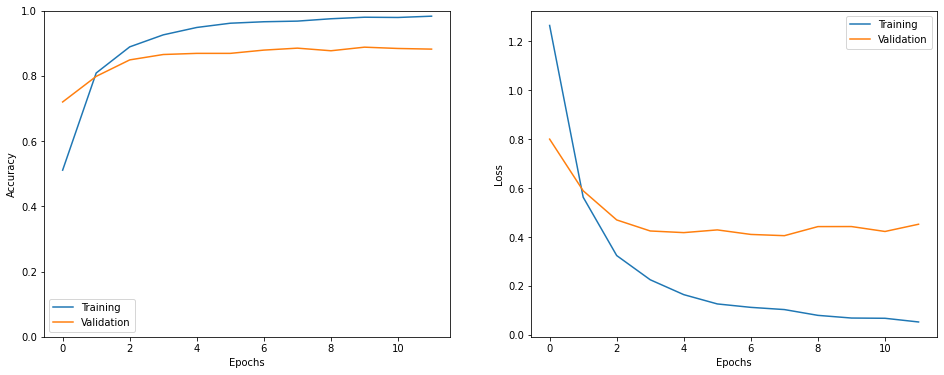

In [27]:
# 88% prediction on the validation set
# now using the function from the beginning to understand how the model adapted

show_history(h)

In [28]:
# now it's time to preprocess the test dataset and evalute the model prediction on it

test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [30]:
pred_eval = model.evaluate(test_seq, test_labels) # 88% prediction accuracy on this dataset as well

63/63 [==============================] - 0s 4ms/step - loss: 0.4881 - accuracy: 0.8775


In [31]:
# creating a function to print the sentence, emotion and the models predicted emotion below

for x in range(0,3):
    i = random.randint(0, len(test_labels) - 1)
    
    print('Sentence:', test_tweets[i])
    print('Emotion:', index_to_class[test_labels[i]])
    
    p = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]
    pred_class = index_to_class[np.argmax(p).astype('uint8')]
    
    print('Predicted Emotion:', pred_class, '\n')

Sentence: i feel amused looking at the little turtle who sneaked in with them
Emotion: joy
Predicted Emotion: joy 

Sentence: i did feel things it was often just repressed fear and anxiety and distrust
Emotion: sadness
Predicted Emotion: sadness 

Sentence: i feel like my room is messy if theyre open
Emotion: sadness
Predicted Emotion: sadness 



In [33]:
preds = np.argmax(model.predict(test_seq), axis = -1) # storing predictions into a variable for the confusion matrix

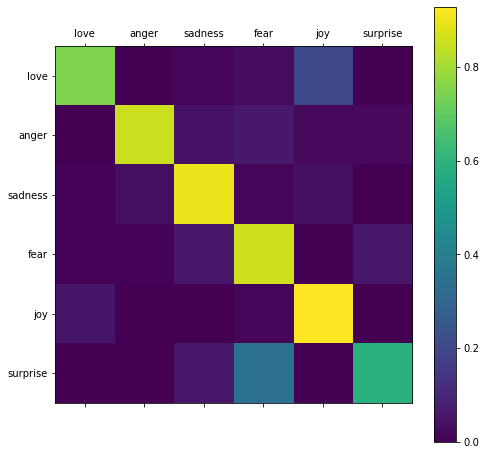

In [34]:
show_confusion_matrix(test_labels, preds, list(classes))

### Based on the confusion matrix above:

+ The model struggled differentiating between Love and Joy than in most cases
+ Surprise and Fear was another case of where the model was trouble differentiating